# Set up

In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import (RashbaJunction, PureRashba, EnergyOutOfRangeError, InsulatorError)
from RashbaJunction.utilities import adjuct_Tick, renormallize_result, make_grid
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/paper_plots_2/paper/"
FINAL_PATH = BASE_PATH+"fig_final/"


print(BASE_PATH)
print(FINAL_PATH)

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/paper/
plots/paper_plots_2/paper/fig_final/


In [2]:
font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]
x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$", "$E_{SO, L} / E_{SO, R}$"]

y_label_pos = [(-.05, 1.03), (-.09, 1)]

# legend_font_size = 15
legend_font_size = 18

region_lbl = ["(a)", "(b)", "(c)"]

DPI = 110

# Single interface

## Different regimes

Pannello (a)
* curva 1: $2E_{SO(L)} = 3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2_{ESO(L)} = 2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = 0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

Pannello (b)
* curva 1: $2E_{SO(L)} = -3*E_Z; 2E_{SO(R)} = 0.5*E_Z$
* curva 2: $2E_{SO(L)} = -2*E_Z; 2E_{SO(R)} = 5*E_Z$
* curva 3: $2E_{SO(L)} = -0.3*E_Z; 2E_{SO(R)} = 0.5*E_Z$

In [3]:
alp_r = -10
Eso_profile = [0, alp_r]
x_profile = [0]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[0]/2
    junction[1] = par[1]/2
    a_l = abs(par[0]/2)
    a_r = abs(par[1]/2)
    m_1 = min(a_l, a_r)
    m_2 = max(a_l, a_r)
    
    try:
        S = junction.get_scattering_matrix(x)
        return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

param = [(.3, .5+1e-8),
         (2, 5),
         (3, .5+1e-8),
        (-.3, .5+1e-8),
         (-2, 5),
        (-3, .5+1e-8)]

en = np.arange(-1.25 + 1e-8, 2, 0.0011)

idx = np.abs(en + 1).argmin()
en[idx] = -1 + 1e-8

idx = np.abs(en - 1).argmin()
en[idx] = 1 - 1e-8

# idx = np.abs(en + 1.24).argmin()
# en[idx] = -1.25 + 1e-8

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

SAVE = False

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.24999999, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.244

Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0244999899999794, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0233999899999793, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0222999899999792, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.021199989999979, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.020099989999979, par=(0.3, 0.50000001)
Only evanescent modes are present. Scattering matrix

Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.009099989999978, par=(3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0079999899999779, par=(3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0068999899999778, par=(3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0057999899999777, par=(3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.0046999899999776, par=(3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not 

In Weak Zeeamn dominated regime E < Eso (1 + (Ez/2Eso)^2) x=-1.24999999, par=(-3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24889999, par=(-3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2477999899999999, par=(-3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2466999899999998, par=(-3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.2455999899999997, par=(-3, 0.50000001)
Only evanescent modes are present. Scattering matrix can not be defined properly; fail to choose the initialisation method for scattering matrix x=-1.24449998

<IPython.core.display.Javascript object>


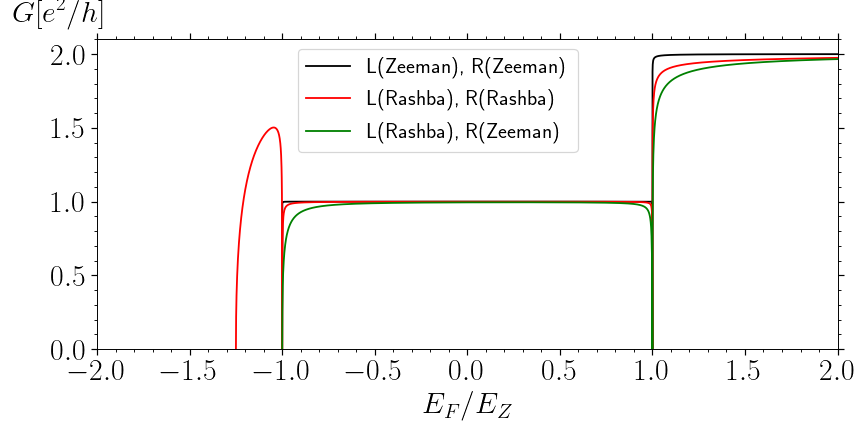

0.3
2
3
plots/paper_plots_2/paper/fig_final/Fig_2_a.pdf


In [4]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {2.0: "Rashba", 3.0: "Rashba", 5.0: "Rashba", 0.3: "Zeeman", 0.5: "Zeeman", 0: "Zeeman"}
colors = ["black", "r", "g"]

for i, k in enumerate(k_list[:3]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string, color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size, bbox_to_anchor=(0.46, 0.6))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False
off = 0
# save_path = BASE_PATH+f"single_interface_Eso=({k_list[off+0][0]:.1f}, {k_list[off+0][1]:.1f})({k_list[off+1][0]:.1f}, {k_list[off+1][1]:.1f})({k_list[off+2][0]:.1f}, {k_list[off+2][1]:.1f})EZ.pdf"
save_path = FINAL_PATH+f"Fig_2_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


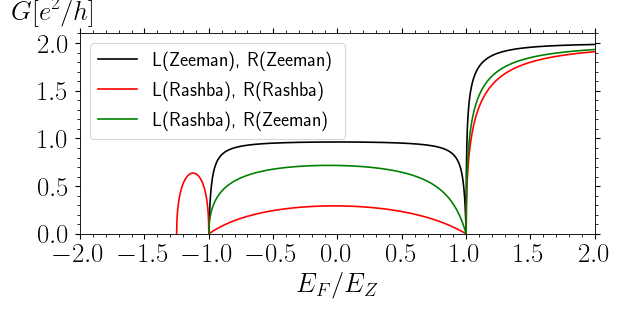

-0.3
-2
-3
plots/paper_plots_2/paper/fig_final/Fig_2_b.pdf


In [9]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# colors = ["g", "r", "black"]
colors = ["black", "r", "g"]

lable_map = {-2.0: "Rashba", -3.0: "Rashba", 5.0: "Rashba", -0.3: "Zeeman", 0.5: "Zeeman"}
for i, k in enumerate(k_list[3:]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
    lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lbl_string,
                    color= colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
axs.legend(fontsize = legend_font_size)
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


SAVE = True
# SAVE = False
off = 3
# save_path = BASE_PATH+f"single_interface_Eso=({k_list[off+0][0]:.1f}, {k_list[off+0][1]:.1f})({k_list[off+1][0]:.1f}, {k_list[off+1][1]:.1f})({k_list[off+2][0]:.1f}, {k_list[off+2][1]:.1f})EZ.pdf"
save_path = FINAL_PATH+f"Fig_2_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Different $E_Z$

Pannello a) $\alpha_L>0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: $E_Z=0.5*E_{SOL}$ (black)

Pannello b) $\alpha_L<0$ e $\alpha_R>0$
* curva 1: $E_Z=0$ (black dashed)
* curva 2: $E_Z=3*E_{SOL}$ (red)
* curva 3: E$_Z=0.5*E_{SOL}$ (black)

In [3]:
import math

# ESOR / ESOL=0.8 

al_r_to_al_l = 0.8
alp_l = 1

Eso_profile = [alp_l, al_r_to_al_l * alp_l]
x_profile = [0]


junction = RashbaJunction2([x_profile, Eso_profile])
pureRashba = PureRashba([x_profile, Eso_profile])


def g(x, par):

    if par == 0:
        j = pureRashba
        j[0] = alp_l
        j[1] = abs(al_r_to_al_l*alp_l)
        
        m = max(-alp_l, -al_r_to_al_l*alp_l)
        m2 = 10
    else:
        j = junction
        j[0] = 1 / par
        j[1] = abs(al_r_to_al_l / par)
        
        a_l = abs(1/par)
        a_r = abs(al_r_to_al_l / par)
        
        m = max(-a_l*(1 + (1/2/a_l)**2), -a_r*(1 + (1/2/a_r)**2))
        m2 = min(a_l, a_r)

    if m > x or (m2 < 1/2 and x<-1):
        return np.nan
    else:
        S = j.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

param = [0, 3, 0.5, -0.5, -3]

en = np.arange(-6 + 1e-8, 10, 0.0011)

# special_opoints = [-al_r_to_al_l*alp_l, -al_r_to_al_l/param[2]*(1+(1/2/al_r_to_al_l*param[2])**2), -1, 1]
# err = [1e-9, 1e-10, 1e-9, -1e-9]

special_opoints = [-al_r_to_al_l*alp_l, -al_r_to_al_l/param[2]*(1+(1/2/al_r_to_al_l*param[2])**2)]
err = [1e-9, 1e-10]

for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e


trasmission_coeff_total = make_grid(en, param, [g])#, gp])

SAVE = False

AttributeError: can't set attribute

In [228]:
idx1 = np.abs(en + 1).argmin()
idx2 = np.abs(en - 1).argmin()

trasmission_coeff_total[0.5][0][idx1] = 1
trasmission_coeff_total[0.5][0][idx2] = 1

trasmission_coeff_total[3][0][idx1] = 0

<IPython.core.display.Javascript object>


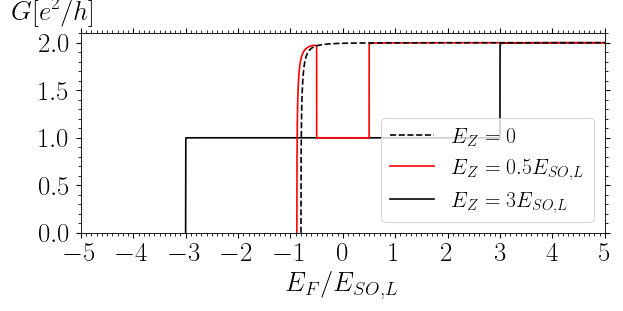

3
0.5
0
plots/paper_plots_2/paper/fig_final/Fig_3_a.pdf


In [234]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "black"]
for i, k in enumerate(k_list[1:3]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", color=colors[i], linestyle="dashed")
    else:
        axs.plot(en*k, trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{k}"r"E_{SO, L}$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 5)

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot

legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)


# axs.grid()
# axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False
# save_path = BASE_PATH+f"single_interface_varying_E_Z(ESOR=0.8ESOL and  alphaL, alphaR>0).pdf"
save_path = FINAL_PATH+f"Fig_3_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


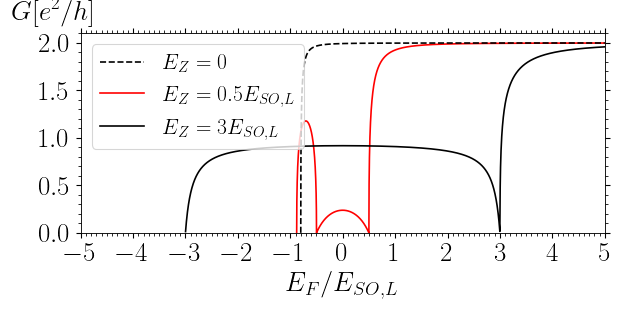

-0.5
-3
0
plots/paper_plots_2/paper/fig_final/Fig_3_b.pdf


In [235]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["r", "black", "black"]
for i, k in enumerate(k_list[3:]+[k_list[0]]):
    print(k)
    if k == 0:
        axs.plot(en/alp_l, trasmission_coeff_total[k][0],
                   label=r"$E_Z = 0$", color=colors[i], linestyle="dashed")
    else:
        axs.plot(en*abs(k), trasmission_coeff_total[k][0],
                   label=r"$E_Z = "f"{abs(k)}"r"E_{SO, L}$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-5, 5)


#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2, 0, 1]
#add legend to plot

legend_font_size2 = 20
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = legend_font_size2)
# axs.grid()
# axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[1], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False
# off = 0
# save_path = BASE_PATH+f"single_interface_varying_E_Z(ESOR=0.8ESOL and  alphaL<0, alphaR>0).pdf"
save_path = FINAL_PATH+f"Fig_3_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# 2 interfaces

## Nanowire contacted to lead

CONFIGURAZIONE NANOWIRE CONTACTED TO LEADS

pannello (a) $k_Z*d=0.1$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

pannello (b) $k_Z*d=20$
* $E_{SO}=0.1*E_Z$ (curva nera)
* $E_{SO}=0.4*E_Z$ (curva rossa)
* $E_{SO}=10*E_Z$ (curva verde) 

In [3]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2
    junction.interface[1] = par[0] / 2
    if x < -1 and np.abs(par[1]) < 0.5 or -np.abs(par[1])*(1+(1/(2*np.abs(par[1])))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

        
param = [(.1, .1), (.1, .4), (.1, 10), (10, .1), (10, .4), (10, 10)]

en = np.arange(-1+1e-7, 1.5, 0.0011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


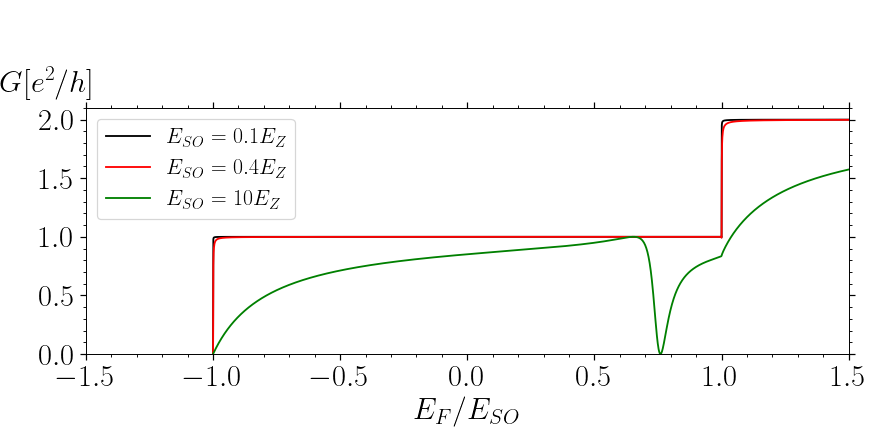

(0.1, 0.1)
(0.1, 0.4)
(0.1, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=0.1.pdf


In [5]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "green"]
for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k[1]}"r"E_Z$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False

save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


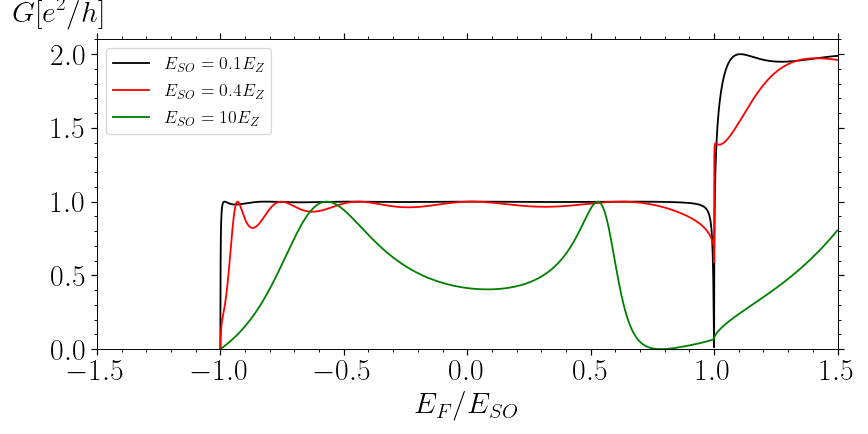

(10, 0.1)
(10, 0.4)
(10, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=10.pdf


In [34]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())


colors = ["black", "r", "green"]
for i, k in enumerate(k_list[3:6]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{abs(k[1])}"r"E_Z$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[1],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array(.5)
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False
# off = 0
save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

## Magnetic barier

### Conductance as a function of $E_F/E_Z$

$E_{SOL}=3*E_Z$ $E_{SOR} = 1.5 E_Z$ 

* panel (a) $k_Z*d=0.3/\sqrt{3}$ which should correspond to $k_{SOL}*d=0.3$
* panel (b) $k_Z*d=2/\sqrt{3}$ which should correspond to $k_{SOL}*d=2$
* panel (c) $k_Z*d=10/\sqrt{3}$ which should correspond to $k_{SOL}*d=10$

In each panel there should be two curves (to be indicated in the legenda)
* black curve ($\alpha_L>0 \  \alpha_R>0$)
* red curve ($\alpha_L<0 \  \alpha_R>0$)

The x-axis should go from -2 to +2 a intervalli di 0.5 e la label dovrebbe essere E_F/EZ.

In [3]:
alp_l = 3
# alp_r = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[1] * alp_l
    junction.interface[0] = -par[0] /2/np.sqrt(alp_l)
    junction.interface[1] = par[0] / 2/np.sqrt(alp_l)
    if x < -1 and alp_r < 0.5 or -alp_r*(1+(1/(2*alp_r))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(x)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

        
param = [(.3, 1), (.3, -1), (2, 1), (2, -1), (10, 1), (10, -1)]

en = np.arange(-2, 2, 0.0011)

special_opoints = [1, -1, -alp_r*(1+(1/(2*alp_r))**2)]
err = [-1e-10, 1e-10, 1e-7]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


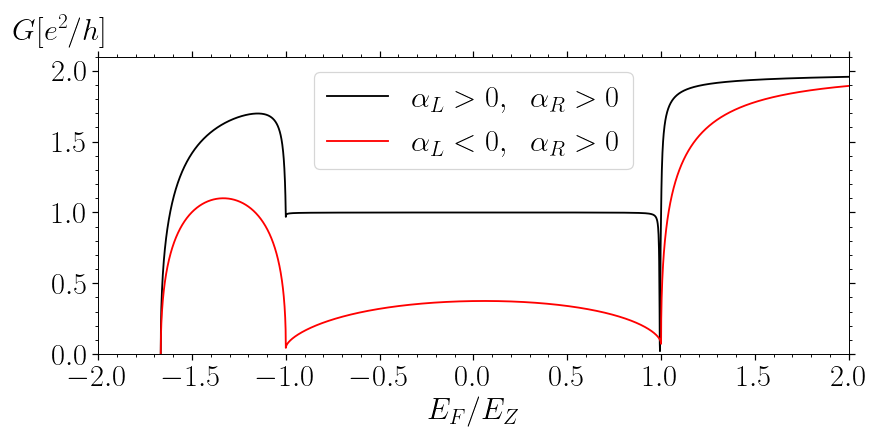

0.3
0.3
plots/paper_plots_2/paper/fig_final/Fig_5_a.pdf


In [13]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}
colors = ["black", "r"]

for i, k in enumerate(k_list[:2]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.5, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_a.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


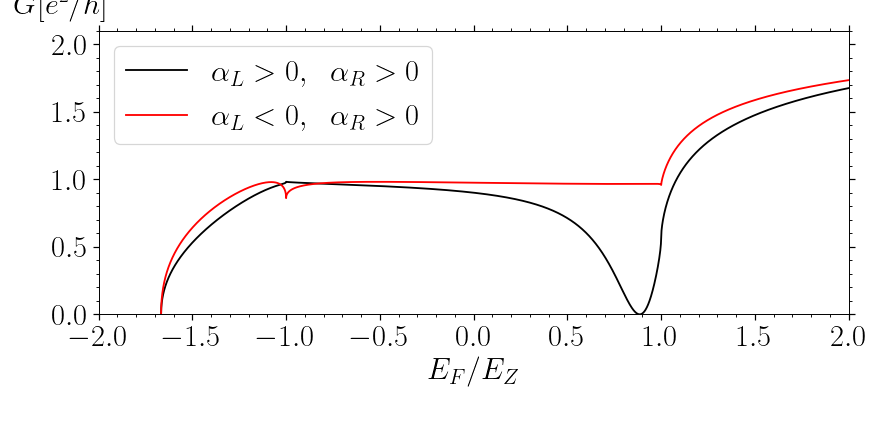

2
2
plots/paper_plots_2/paper/fig_final/Fig_5_c.pdf


In [14]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[2:4]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])


axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_c.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


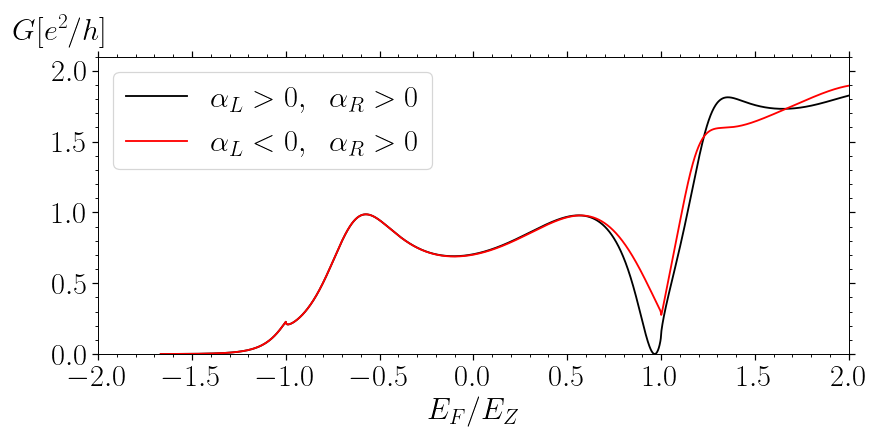

10
10
plots/paper_plots_2/paper/fig_final/Fig_5_b.pdf


In [15]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
lable_map = {1: r"$\alpha_L>0, \hspace{0.5cm}  \alpha_R>0$", -1: r"$\alpha_L<0, \hspace{0.5cm} \alpha_R>0$"}

colors = ["black", "r"]

for i, k in enumerate(k_list[4:]):
    print(k[0])
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=lable_map[k[1]], color=colors[i])

axs.set_ylim(0,2.1)
axs.set_xlim(-2, 2)

# axs.grid()
legend_font_size2 = 25
axs.legend(fontsize = legend_font_size2)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[0], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

SAVE = True
# SAVE = False
# save_path = BASE_PATH+f"magnetic barier kso*d = {k[0]} Eso=(pm{alp_l}, {alp_r}).pdf"
save_path = FINAL_PATH+f"Fig_5_b.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### Conductance as a function of $k_{SOL}*d$ [from 0.1 to 20]

$E_{SOL} = 3*E_Z$ $E_{SOR} = 1.5 E_Z$

(nel codice farai variare $k_Z*d$, ma poi per fare il grafico la colonna delle x dovrà contenere $k_{SOL}*d=\sqrt{3}*kZ*d$, quindi $k_Z*d$ dovrà variare da $0.1/\sqrt{3}$ a $20/\sqrt{3}$)

panel (a) $\alpha_L>0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

panel (b)   $\alpha_L<0 \  \alpha_R>0$
* 3 curves displaying the conductance at fixed energy
* $E=0$ (black)
* $E=+0.8*E_Z$ (red)
* $E=-0.8*E_Z$(green)

In [187]:
alp_l = 3
alp_r = 1.5
Eso_profile = [alp_l, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[0] = par[0] * alp_l
    junction.interface[0] = -x /2/np.sqrt(alp_l)
    junction.interface[1] = x /2/np.sqrt(alp_l)
    if x < -1 and alp_r < 0.5 or -alp_r*(1+(1/(2*alp_r))**2) > x:
        return np.nan
    else:
        S = junction.get_scattering_matrix(par[1])
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

        
param = [(1, 0), (1, .8), (1, -.8), (-1, 0), (-1, .8), (-1, -.8)]

en = np.arange(0., 20, 0.0011)

# special_opoints = [1, -1, -alp_r*(1+(1/(2*alp_r))**2)]
# err = [-1e-10, 1e-7, 1e-7]
# for p, e in zip(special_opoints, err):
#     idx = np.abs(en - p).argmin()
#     en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


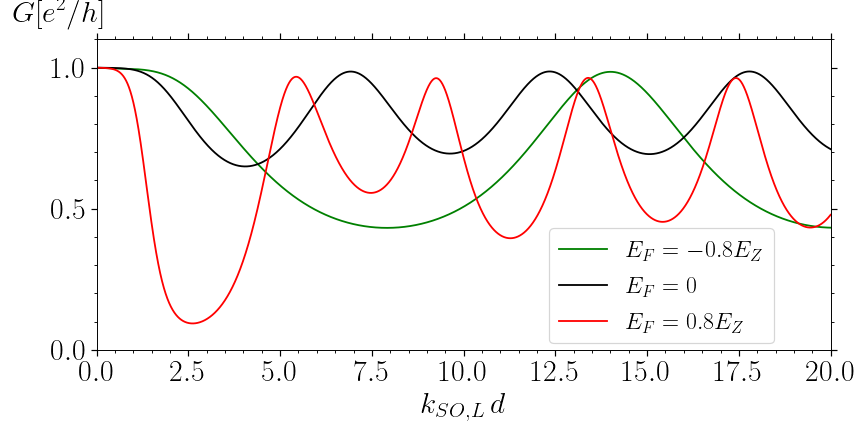

(1, -0.8)
(1, 0)
(1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(3, 0, 1.5).pdf


In [208]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[2]]+k_list[:2]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)

# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=({alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>


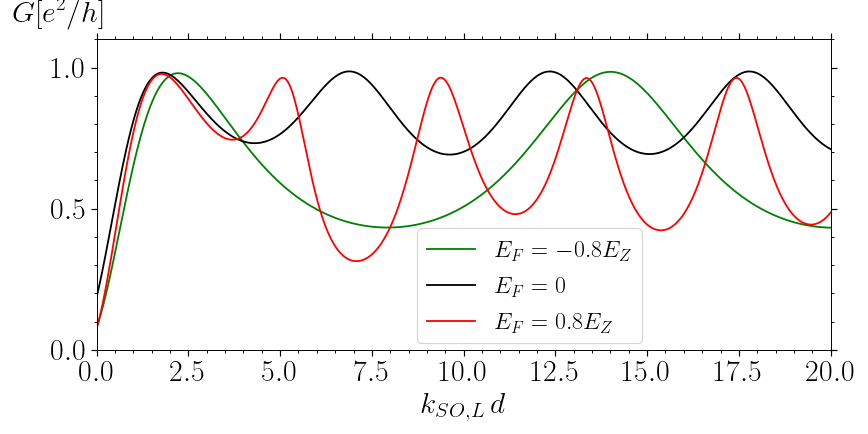

(-1, -0.8)
(-1, 0)
(-1, 0.8)
plots/paper_plots_2/paper/magnetic barier in function of kso*d, Eso=(-3, 0, 1.5).pdf


In [211]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["green", "black", "r"]
for i, k in enumerate([k_list[-1]]+k_list[3:-1]):
    print(k)
    if k[1] == 0:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = 0$", color=colors[i])
    else:
        axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_F = "f"{k[1]}"r"E_Z$", color=colors[i])


axs.set_ylim(0,1.1)
axs.set_xlim(0, 20)


# axs.grid()
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.59, 0.43))
axs.set_xlabel(x_label[3], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([2.5])
x_minor = np.array([0.5])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])


SAVE = True
# SAVE = False

save_path = BASE_PATH+f"magnetic barier in function of kso*d, Eso=(-{alp_l}, 0, {alp_r}).pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

### conductance as function $E_{SO, L}/E_{SO, R}$

In [16]:
ev_to_j = 1.602176634e-19
#InSb
m = 0.015*cc.m_e

k_so = np.sqrt(2 *m* 0.3e-3*ev_to_j)/cc.hbar
l_so = 1/k_so
print(f"k_z {k_so}") #1/Metr
print(f"l_so {l_so*10**9:.2f}nm") #Metr

k_z 10867878.84655432
l_so 92.01nm


In [61]:
alp_r =  3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

junction = RashbaJunction2([x_profile, Eso_profile])


def g(x, par):
    junction[0] = x * alp_r
    junction.interface[0] = -par / 2 /np.sqrt(alp_r)
    junction.interface[1] = par /2 / np.sqrt(alp_r)


    m = False
    if m:
        return np.nan
    else:
        S = junction.get_scattering_matrix(0)
        if not S.is_unitary:
            print(f"not unitary matrix length: x-> {x}, par-> {par}")
            return np.nan
        else:
            return S.t_coef

        
param = np.array([0.3, 1, 2, 10]) * 100 / 92

print(param)
print(np.array(param)/np.sqrt(alp_r))

en = np.arange(-25, 25, 0.011)
# en = np.arange(-40, 40, 0.11)

special_opoints = [0]
err = [0]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

[ 0.32608696  1.08695652  2.17391304 10.86956522]
[0.18826639 0.62755464 1.25510928 6.2755464 ]


<IPython.core.display.Javascript object>


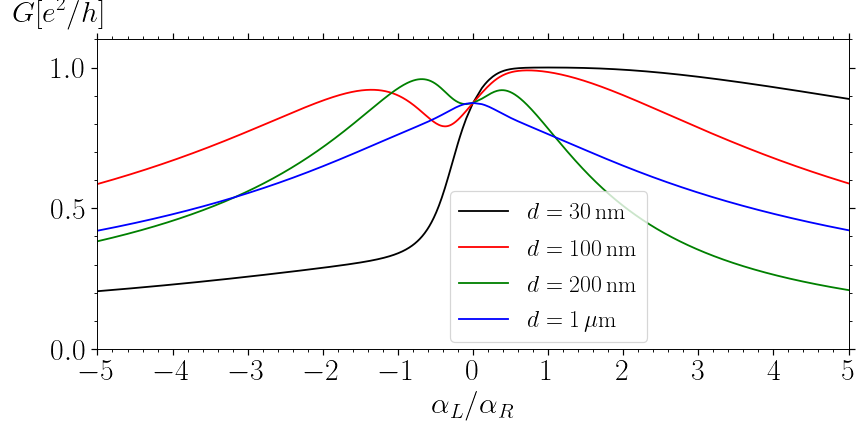

0.32608695652173914
1.0869565217391304
2.1739130434782608
10.869565217391305
plots/paper_plots_2/paper/fig_final/Fig7.pdf


In [80]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

# lable_map = {1: r"$\alpha_L>0 \  \alpha_R>0$", -1: r"$\alpha_L<0 \  \alpha_R>0$"}
colors = ["black", "r", "g", "b"]

for i, k in enumerate(k_list):
    print(k)
#     fr"$2E_{{SO}}^{{(L)}} = {lable_map[round(k[0],1)]}  E_Z$,"
#                              fr"\ $2E_{{SO}}^{{(R)}} = {lable_map[round(k[0],1)]}  E_Z $"
#     lbl_string = f"L({lable_map[round(k[0],1)]}), R({lable_map[round(k[1],1)]})"
    if k>10:
        lbl = r"$d = "f"{1}\, \mu "+r"\textrm{m}$"
    else:
        lbl = r"$d = "f"{k*l_so*10**9:.0f}"+r"\, \textrm{nm}$"
    axs.plot(np.sign(en)*np.sqrt(np.abs(en)), trasmission_coeff_total[k][0],
#                    label=r"$k_{SO,R}d = "f"{k}$", color=colors[i])
                   label=lbl, color=colors[i])


axs.set_ylim(0,1.1)
# axs.set_xlim(en[0], en[-1]+0.01)
axs.set_xlim(-5, 5+0.01)


# axs.grid()
legend_font_size2 = 20
axs.legend(fontsize = legend_font_size2, bbox_to_anchor=(0.6, 0.55))
axs.set_xlabel(r"$\alpha_L/\alpha_R$", fontdict=font)
# axs.set_xlabel(x_label[4], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([1])
x_minor = np.array([0.2])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

SAVE = True
# SAVE = False

# save_path = BASE_PATH+f"Conductance as function of alphaL\\alphaR with E = 0, ESOR = {alp_r} EZ.pdf"
save_path = FINAL_PATH+f"Fig7.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

# Angle test Fig1

In [60]:
from RashbaJunction.RashbaJunction_0_4 import WaveVector

alp_r =  3
Eso_profile = [1, 0, alp_r]
x_profile = [0, 1]

j = RashbaJunction2([x_profile, Eso_profile])

eso = 0.12
j.E_so = -eso

# ee = [0, -1-1e-9, 1, -eso*(1+(1/2/eso)**2)+1e-10, 2]
ee = [0, -1, 1, 2]

print(f"SO energy {eso}")
for e in ee:
#     j.prepare_rashba_WF(e)
    j.prepare_week_zeeman_WF(e)
    
    print(f"Energy {e}")
    for m, k, b in zip(j.mod, j.wave_vector, j.band):
        if m == WaveVector.k:
            print(f"\t wave vector {k}")
            print("\t", j.omega_k(0, k, b))
#             c = k[0] / np.sqrt(k[0]**2 + 1)
#             print(np.sign(c))
#             print(f"\t theta {np.arccos(c)/np.pi}")

    

SO energy 0.12
Energy 0
	 wave vector [-0.78027589  1.12623124]
	 [0.43865304+0.j 0.8986565 +0.j]
	 wave vector [ 0.78027589 -1.12623124]
	 [0.8986565 +0.j 0.43865304+0.j]
Energy -1
	 wave vector [-0.  0.]
	 [0.70710678+0.j 0.70710678+0.j]
	 wave vector [ 0. -0.]
	 [0.70710678+0.j 0.70710678+0.j]
Energy 1
	 wave vector [-1.09105454  1.57480157]
	 [0.36249206+0.j 0.93198686+0.j]
	 wave vector [ 1.09105454 -1.57480157]
	 [0.93198686+0.j 0.36249206+0.j]
	 wave vector [-0.  0.]
	 [-0.70710678+0.j  0.70710678+0.j]
	 wave vector [ 0. -0.]
	 [-0.70710678+0.j  0.70710678+0.j]
Energy 2
	 wave vector [-1.32551982  1.91322306]
	 [0.31756673+0.j 0.94823593+0.j]
	 wave vector [ 1.32551982 -1.91322306]
	 [0.94823593+0.j 0.31756673+0.j]
	 wave vector [-0.62721385  0.90530521]
	 [-0.87502769+0.j  0.48407286+0.j]
	 wave vector [ 0.62721385 -0.90530521]
	 [-0.48407286+0.j  0.87502769+0.j]
